In [1]:
import numpy as np
import numpy.linalg as alg
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [5]:
df = pd.read_csv('ceph_hgdp_minor_code_XNA.betterAnnotated.csv')
df.head(5)

,snp,chr,pos,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,rs10000929,4,131516474,1,0,0,1,1,0,1,...,1,0,1,0,0,2,0,0,0,2
1,rs10002472,4,159087423,2,1,2,2,0,2,2,...,2,2,2,1,2,1,1,2,0,2
2,rs10005550,4,128697858,2,2,2,2,1,0,1,...,2,2,2,1,2,2,2,2,1,2
3,rs10007576,4,59063992,2,0,2,1,2,2,2,...,2,1,2,1,2,2,1,1,1,0
4,rs10007998,4,35988597,0,0,0,0,0,0,0,...,2,1,2,0,2,0,1,2,2,1


In [6]:
snp = df.drop(columns=['snp', 'chr', 'pos'])

snp.head(5)

,HGDP00448,HGDP00479,HGDP00985,HGDP01094,HGDP00982,HGDP00911,HGDP01202,HGDP00927,HGDP00461,HGDP00451,...,HGDP01342,HGDP00824,HGDP01319,HGDP01357,HGDP00549,HGDP00953,HGDP01070,HGDP01376,HGDP00671,HGDP01024
0,1,0,0,1,1,0,1,1,1,1,...,1,0,1,0,0,2,0,0,0,2
1,2,1,2,2,0,2,2,1,2,2,...,2,2,2,1,2,1,1,2,0,2
2,2,2,2,2,1,0,1,1,2,2,...,2,2,2,1,2,2,2,2,1,2
3,2,0,2,1,2,2,2,1,1,2,...,2,1,2,1,2,2,1,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,2,1,2,0,2,0,1,2,2,1


In [7]:
(P, N) = snp.shape
print('The shape pf origianl dataset is {} * {}'.format(P, N))

The shape pf origianl dataset is 488919 * 1043


In [8]:
info = pd.read_csv('ceph_hgdp_minor_code_XNA.sampleInformation.csv')

info.head(5)

,ID,Gender,Population,Geographic.origin,Geographic.area,region,distance,latitude,longtitude
0,HGDP00448,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
1,HGDP00479,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
2,HGDP00985,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
3,HGDP01094,M,Biaka Pygmies,Central African Republic,Central Africa,Africa,2384.859098,4.0,17.0
4,HGDP00982,M,Mbuti Pygmies,Democratic Republic of Congo,Central Africa,Africa,1335.495772,1.0,29.0


### MDS Algorithm

In [11]:
k1=1000 
k2=2000

R1 = np.zeros((k1, P), dtype=float)
R2 = np.zeros((k2, P), dtype=float)

for i in range(k1):
    t = random.sample(range(0, P), k1)
    R1[i, t] = 1/k1
for i in range(k2):
    t = random.sample(range(0, P), k2)
    R2[i, t] = 1/k2    

In [12]:
H = - np.ones((N, N))/N
H += np.eye(N)

X = np.array(snp)

X1 = np.dot(R1, X)
X1_centered = np.dot(X1, H)
K1 = np.dot(X1_centered.T, X1_centered)

X2 = np.dot(R2, X)
X2_centered = np.dot(X2, H)
K2 = np.dot(X2_centered.T, X2_centered)

In [13]:
eigen_values_k1, eigen_vectors_k1 = alg.eig(K1)
eigen_pairs_k1 = [ (eigen_values_k1[i], eigen_vectors_k1[:, i]) for i in range(len(eigen_values_k1))]

eigen_values_k2, eigen_vectors_k2 = alg.eig(K2)
eigen_pairs_k2 = [ (eigen_values_k2[i], eigen_vectors_k2[:, i]) for i in range(len(eigen_values_k2))]

In [14]:
eigen_pairs_k1.sort(key=lambda eigen_pairs_k1: eigen_pairs_k1[0], reverse=True)
eigen_pairs_k2.sort(key=lambda eigen_pairs_k2: eigen_pairs_k2[0], reverse=True)

In [15]:
lambda1_k1, pca1_k1 = eigen_pairs_k1[0]
pca1_k1 = pca1_k1.astype(np.float64)
cord1_k1 = math.sqrt(lambda1_k1) * pca1_k1
lambda2_k1, pca2_k1 = eigen_pairs_k1[1]
pca2_k1 = pca2_k1.astype(np.float64)
cord2_k1 = math.sqrt(lambda2_k1)* pca2_k1

lambda1_k2, pca1_k2 = eigen_pairs_k2[0]
pca1_k2 = pca1_k2.astype(np.float64)
cord1_k2 = math.sqrt(lambda1_k2) * pca1_k2
lambda2_k2, pca2_k2 = eigen_pairs_k2[1]
pca2_k2 = pca2_k2.astype(np.float64)
cord2_k2 = math.sqrt(lambda2_k2) * pca2_k2

/var/folders/7d/q7tv11ln64ngg68mf17_cp_m0000gn/T/ipykernel_1858/1801765401.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pca1_k1 = pca1_k1.astype(np.float64)
/var/folders/7d/q7tv11ln64ngg68mf17_cp_m0000gn/T/ipykernel_1858/1801765401.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  cord1_k1 = math.sqrt(lambda1_k1) * pca1_k1
/var/folders/7d/q7tv11ln64ngg68mf17_cp_m0000gn/T/ipykernel_1858/1801765401.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pca2_k1 = pca2_k1.astype(np.float64)
/var/folders/7d/q7tv11ln64ngg68mf17_cp_m0000gn/T/ipykernel_1858/1801765401.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  cord2_k1 = math.sqrt(lambda2_k1)* pca2_k1


### Visualization

In [16]:
region = info['region']
keys = list(region.unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

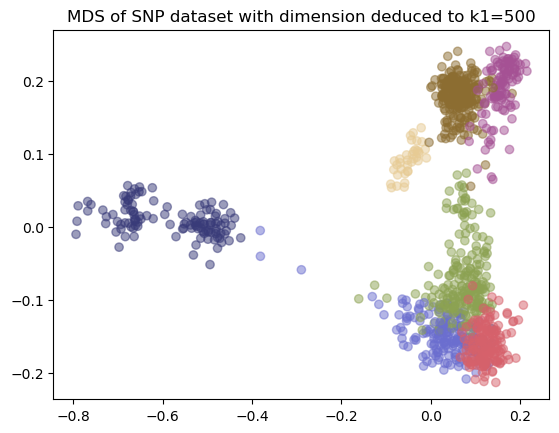

In [17]:
df1 = pd.DataFrame(dict(pca1=cord1_k1, pca2=cord2_k1, region=region))
fig1, ax1 = plt.subplots()
ax1.scatter(df1['pca1'], df1['pca2'], c=df1['region'].map(color_dict), alpha=0.5)
plt.title('MDS of SNP dataset with dimension deduced to k1=500')    
plt.show()

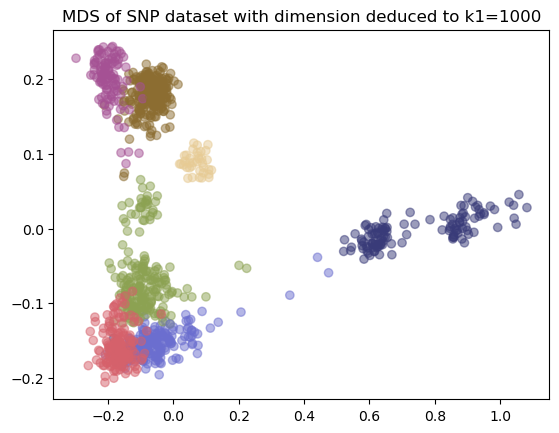

In [18]:
df2 = pd.DataFrame(dict(pca1=cord1_k2, pca2=cord2_k2, region=region))
fig2, ax2 = plt.subplots()
ax2.scatter(df2['pca1'], df2['pca2'], c=df2['region'].map(color_dict), alpha=0.5)
plt.title('MDS of SNP dataset with dimension deduced to k1=1000')
plt.show()

### Conclusion
As shown in these two figures, I explore the genetic variation of those persons with their geographic variations by MDS/PCA with random projections. The conclusions introduced in class about the SNP dataset can be verified by these results. In this exercise, due to the limitation of the computation power of my computer, only k1 = 1000 and k2 = 2000 are explored. However, experiments with larger k can be conducted similarly and the conclusions are similar.